In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [3]:
# Checking for class imbalance

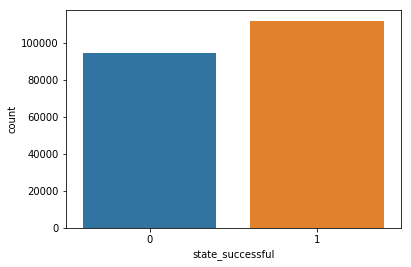

In [4]:
sns.countplot(kickstarter['state_successful'])

In [5]:
kickstarter['state_successful'].value_counts()

1    112120
0     94929
Name: state_successful, dtype: int64

In [6]:
kickstarter.shape

(207049, 24)

In [7]:
percent_success = 112120/207049
percent_fail = 94929/207049
print(percent_success)
print(percent_fail)

0.5415143275263343
0.4584856724736657


In [8]:
# the classes appear to be pretty well balanced already so we're going to proceed.

In [9]:
kickstarter.columns

Index(['id', 'slug', 'state_successful', 'goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'location', 'child_category'],
      dtype='object')

In [10]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
X.shape, y.shape

((207049, 19), (207049,))

In [13]:
X_mid, X_test, y_mid, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify = y)

In [14]:
X_mid.shape, y_mid.shape, X_test.shape, y_test.shape

((165639, 19), (165639,), (41410, 19), (41410,))

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_mid, y_mid, test_size=0.25, random_state=42, stratify = y_mid)

In [16]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((124229, 19), (124229,), (41410, 19), (41410,))

In [17]:
# running the training data through all the models with default parameters for comparison

### KNN ###

In [18]:
knn = KNeighborsClassifier()

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn_pred = knn.predict(X_val)

In [21]:
print('KNN Results:')
print(confusion_matrix(y_val,knn_pred))
print(classification_report(y_val, knn_pred))
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_val, y_val))

KNN Results:
[[11500  7486]
 [ 6318 16106]]
              precision    recall  f1-score   support

           0       0.65      0.61      0.62     18986
           1       0.68      0.72      0.70     22424

   micro avg       0.67      0.67      0.67     41410
   macro avg       0.66      0.66      0.66     41410
weighted avg       0.67      0.67      0.67     41410

KNN score: 0.666651


In [68]:
y_score = knn.predict_proba(X_val)[:, 1]
knn_fpr, knn_tpr, knn_auc_thresholds = roc_curve(y_val, y_score)
roc_auc_knn = auc(knn_fpr, knn_tpr)
print(auc(knn_fpr, knn_tpr))

0.712935529903383


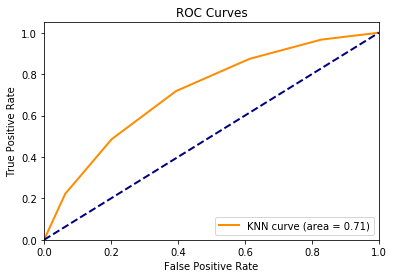

In [77]:
plt.figure()
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression ###

In [24]:
logistic = LogisticRegression()

In [25]:
logistic.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
logistic_pred = logistic.predict(X_val)

In [27]:
print('Logistic Results:')
print(confusion_matrix(y_val,logistic_pred))
print(classification_report(y_val, logistic_pred))
print('Logistic score: %f' % logistic.fit(X_train, y_train).score(X_val, y_val))

Logistic Results:
[[11358  7628]
 [ 5051 17373]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64     18986
           1       0.69      0.77      0.73     22424

   micro avg       0.69      0.69      0.69     41410
   macro avg       0.69      0.69      0.69     41410
weighted avg       0.69      0.69      0.69     41410



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic score: 0.693818


In [106]:
y_score = logistic.predict_proba(X_val)[:, 1]
logistic_fpr, logistic_tpr, logistic_auc_thresholds = roc_curve(y_val, y_score)
roc_auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc(logistic_fpr, logistic_tpr))

0.7578564799742221


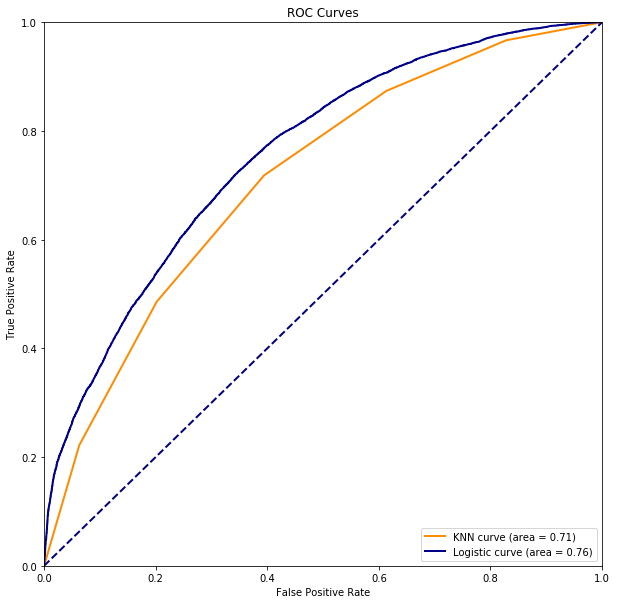

In [107]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes ###

In [30]:
gaussian = naive_bayes.GaussianNB()
bernoulli = naive_bayes.BernoulliNB()

In [31]:
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
gaussian_pred = gaussian.predict(X_val)

In [33]:
print('Gaussian Results:')
print(confusion_matrix(y_val,gaussian_pred))
print(classification_report(y_val, gaussian_pred))
print('Gaussian score: %f' % gaussian.fit(X_train, y_train).score(X_val, y_val))

Gaussian Results:
[[ 8234 10752]
 [ 3018 19406]]
              precision    recall  f1-score   support

           0       0.73      0.43      0.54     18986
           1       0.64      0.87      0.74     22424

   micro avg       0.67      0.67      0.67     41410
   macro avg       0.69      0.65      0.64     41410
weighted avg       0.68      0.67      0.65     41410

Gaussian score: 0.667472


In [108]:
y_score = gaussian.predict_proba(X_val)[:, 1]
gaussian_fpr, gaussian_tpr, auc_thresholds = roc_curve(y_val, y_score)
roc_auc_gaussian = auc(gaussian_fpr, gaussian_tpr)
print(auc(gaussian_fpr, gaussian_tpr))

0.7331692071187966


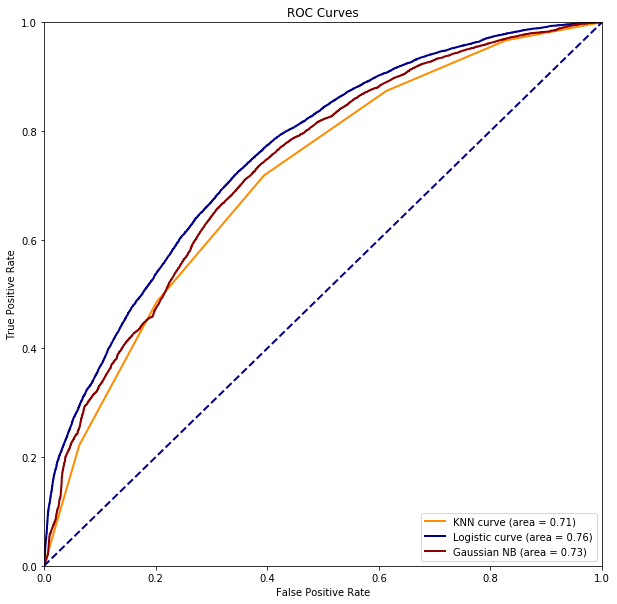

In [109]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [36]:
bernoulli.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [37]:
bernoulli_pred = bernoulli.predict(X_val)

In [38]:
print('Bernoulli Results:')
print(confusion_matrix(y_val,bernoulli_pred))
print(classification_report(y_val, bernoulli_pred))
print('Bernoulli score: %f' % bernoulli.fit(X_train, y_train).score(X_val, y_val))

Bernoulli Results:
[[10359  8627]
 [ 4491 17933]]
              precision    recall  f1-score   support

           0       0.70      0.55      0.61     18986
           1       0.68      0.80      0.73     22424

   micro avg       0.68      0.68      0.68     41410
   macro avg       0.69      0.67      0.67     41410
weighted avg       0.69      0.68      0.68     41410

Bernoulli score: 0.683217


In [110]:
y_score = bernoulli.predict_proba(X_val)[:, 1]
bernoulli_fpr, bernoulli_tpr, auc_thresholds = roc_curve(y_val, y_score)
roc_auc_bernoulli = auc(bernoulli_fpr, bernoulli_tpr)
print(auc(bernoulli_fpr, bernoulli_tpr))

0.7456059063499068


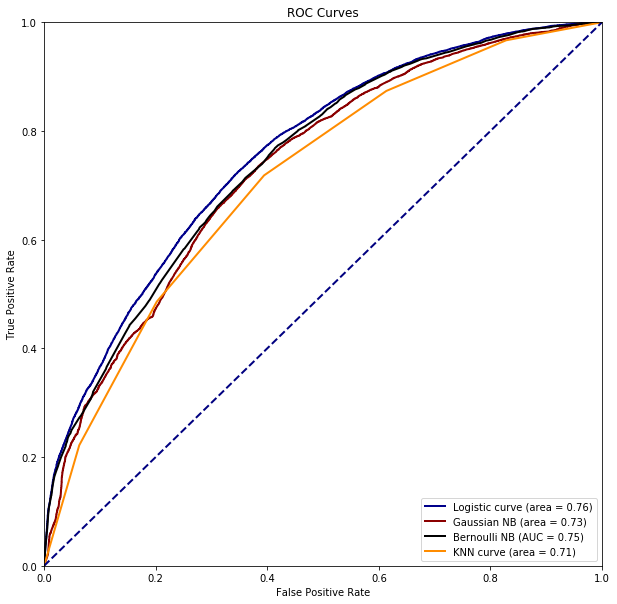

In [111]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Decision Tree ###

In [41]:
tree = DecisionTreeClassifier()

In [42]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
tree_pred = tree.predict(X_val)

In [44]:
print('Tree Results:')
print(confusion_matrix(y_val, tree_pred))
print(classification_report(y_val, tree_pred))
print('Tree score: %f' % tree.fit(X_train, y_train).score(X_val, y_val))

Tree Results:
[[12041  6945]
 [ 8099 14325]]
              precision    recall  f1-score   support

           0       0.60      0.63      0.62     18986
           1       0.67      0.64      0.66     22424

   micro avg       0.64      0.64      0.64     41410
   macro avg       0.64      0.64      0.64     41410
weighted avg       0.64      0.64      0.64     41410

Tree score: 0.635837


In [117]:
y_score = tree.predict_proba(X_val)[:, 1]
tree_fpr, tree_tpr, auc_thresholds = roc_curve(y_val, y_score)
roc_auc_tree = auc(tree_fpr, tree_tpr)
print(auc(tree_fpr, tree_tpr))

0.6466547876744451


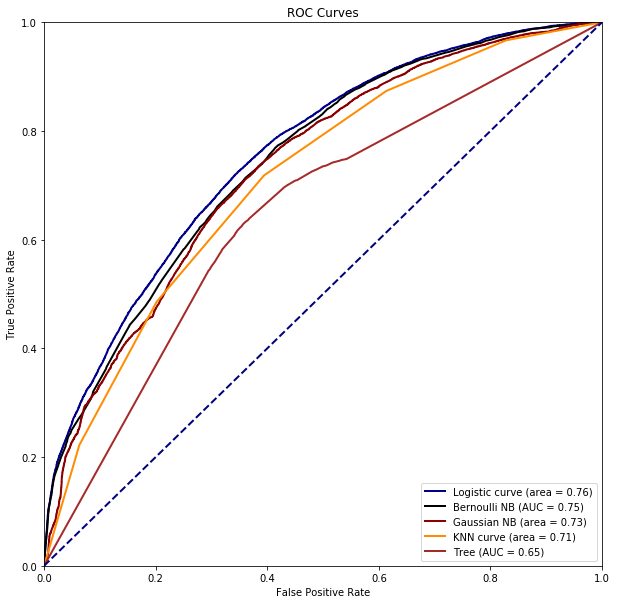

In [118]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         lw=lw, label='Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

### Random Forest ###

In [47]:
forest = RandomForestClassifier()

In [48]:
forest.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
forest_pred = forest.predict(X_val)

In [50]:
print('Forest Results:')
print(confusion_matrix(y_val, tree_pred))
print(classification_report(y_val, forest_pred))
print('Forest score: %f' % forest.fit(X_train, y_train).score(X_val, y_val))

Forest Results:
[[12041  6945]
 [ 8099 14325]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.63     18986
           1       0.69      0.69      0.69     22424

   micro avg       0.66      0.66      0.66     41410
   macro avg       0.66      0.66      0.66     41410
weighted avg       0.66      0.66      0.66     41410

Forest score: 0.663680


In [120]:
y_score = forest.predict_proba(X_val)[:, 1]
forest_fpr, forest_tpr, auc_thresholds = roc_curve(y_val, y_score)
roc_auc_forest = auc(forest_fpr, forest_tpr)
print(auc(forest_fpr, forest_tpr))

0.7210352487040135


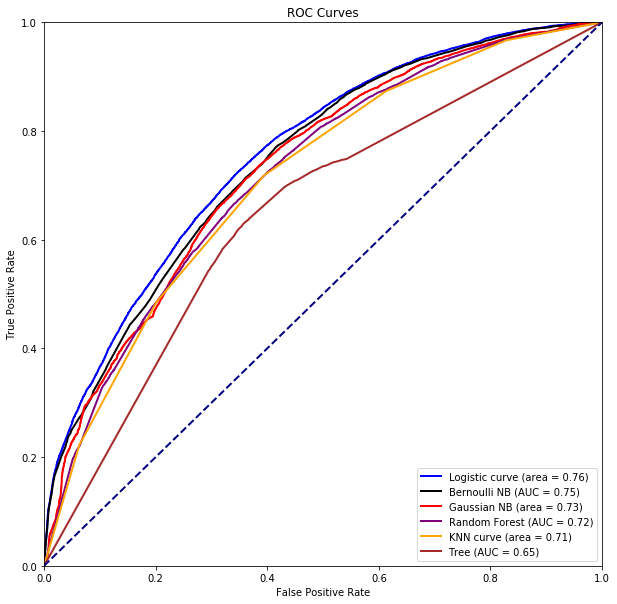

In [123]:
plt.figure(figsize=(10,10))
lw = 2

plt.plot(logistic_fpr, logistic_tpr, color='blue',
         lw=lw, label='Logistic curve (area = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(gaussian_fpr, gaussian_tpr, color='red',
         lw=lw, label='Gaussian NB (area = %0.2f)' % roc_auc_gaussian)
plt.plot(forest_fpr, forest_tpr, color='purple',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(knn_fpr, knn_tpr, color='orange',
         lw=lw, label='KNN curve (area = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         lw=lw, label='Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [148]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,215),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### SVM ###

In [151]:
SVC = SVC()

In [ ]:
SVC.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
SVC_pred = SVC.predict(X_val)

In [ ]:
print('SVC Results:')
print(confusion_matrix(y_val, SVC_pred))
print(classification_report(y_val, SVC_pred))
print('SVC score: %f' % SVC.fit(X_train, y_train).score(X_val, y_val))

In [ ]:
y_score = SVC.predict_proba(X_val)[:, 1]
SVC_fpr, SVC_tpr, auc_thresholds = roc_curve(y_val, y_score)
roc_auc_SVC = auc(SVC_fpr, SVC_tpr)
print(auc(SVC_fpr, SVC_tpr))

In [ ]:
fig = plt.figure(figsize=(14,14))
lw = 2

plt.plot(logistic_fpr, logistic_tpr, color='darkblue',
         lw=lw, label='Logistic curve (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(bernoulli_fpr, bernoulli_tpr, color='black',
         lw=lw, label='Bernoulli NB (AUC = %0.2f)' % roc_auc_bernoulli)
plt.plot(SVC_fpr, SVC_tpr, color='green',
         lw=lw, label='SVM (AUC = %0.2f)' % roc_auc_SVC)
plt.plot(gaussian_fpr, gaussian_tpr, color='darkred',
         lw=lw, label='Gaussian NB (AUC = %0.2f)' % roc_auc_gaussian)
plt.plot(forest_fpr, forest_tpr, color='purple',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)
plt.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='KNN curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot(tree_fpr, tree_tpr, color='brown',
         lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curves', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
plt.savefig('roc_curves_all.png')
plt.savefig('roc_curves_svg_all.svg')
plt.show()